## Predicting Breast Cancer using Machine Learning

### 1. Problem Definition

In this project, we will be exploring binary classification.

We will be using a number of different features to predict whether a person have breast cancer or not.


### 2. Data

The original data comes from the Wisconsin database from UCI Machine Learning Repository.

The original dataset contains 30 features, but only 10 features will be used in this project. 

### 3. Evaluation

If we can reach 95% accuracy at predicting whether or not a patient has breast cancer, we'll pursue this project

### 4. Features

#### Breast Cancer Data Dictionary

Below is a list of features we will use to predict the target variable (breast cancer or no breast cancer). 

1. radius_mean -  radius (mean of distances from center to points on the perimeter)
2. texture_mean - texture (standard deviation of gray-scale values)
3. perimeter_mean - mean size of the core tumor
4. area_mean - area
5. smoothness_mean - mean of local variation in radius lengths
6. compactness_mean - (mean of perimeter^2 / area - 1.0)
7. concavity_mean - (severity of concave portions of the contour)
8. concave points_mean (number of concave portions of the contour)
9. symmetry_mean
10. fractal dimension_mean ("coastline approximation" - 1)

### Preparing the tools

#### Loading libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## Models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve 

### Load Data 

In [2]:
df = pd.read_csv('data/breast_cancer_data.csv')
df.shape

(569, 33)

### Clean and prepare data

In [3]:
df.drop(['id', 'Unnamed: 32'],axis=1,inplace=True)

In [4]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [5]:
df.isnull().sum() # Check if there are null values in each column

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Exploratory Data Analysis (EDA) 

In [6]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:>

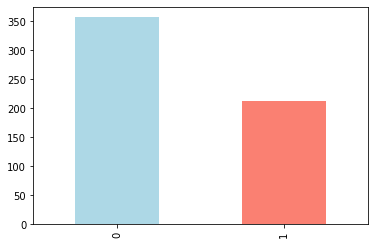

In [7]:
df.diagnosis.value_counts().plot(kind="bar", color=["lightblue", "salmon"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Features vs Diagnosis

In [10]:
features_mean = list(df.columns[1:11])
## Split df into two 
dfB = df[df['diagnosis'] == 0] 
dfM = df[df['diagnosis'] == 1]

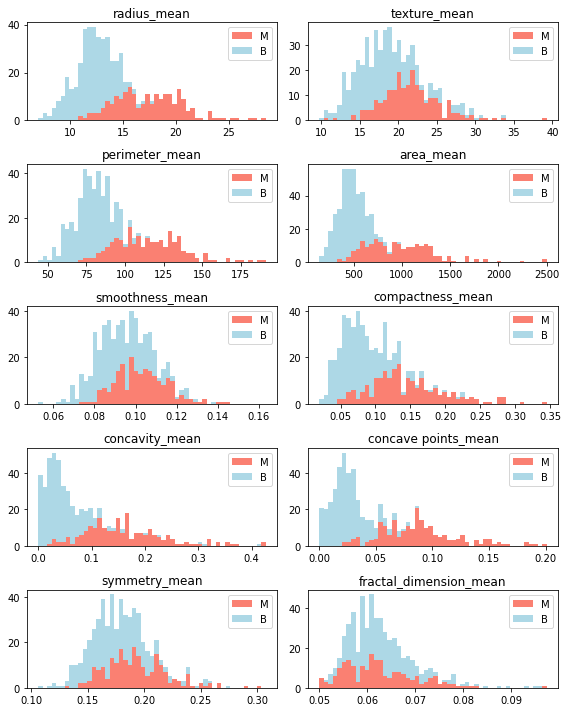

In [11]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for i, axes in enumerate(axes):
    binwidth = (max(df[features_mean[i]]) - min(df[features_mean[i]])) / 50
    axes.hist([dfM[features_mean[i]], dfB[features_mean[i]]], bins=np.arange(min(df[features_mean[i]]), max(df[features_mean[i]]) + binwidth, binwidth), stacked=True, label=['M','B'], color=['salmon', 'lightblue'])
    axes.legend(loc='upper right')
    axes.set_title(features_mean[i])
plt.tight_layout()
plt.show() 

### What can we infer from this? 

1. Based on the histograms, it can be seen that larger values in radius, perimeter, area, compactness, concavity, and concave points show correlation with malignant tumors. Therefore, these features might be more significant in the classification of cancer tumors.  

2. On the other hand, larger values in texture, smoothness, symmetry, and fractal dimension do not show correlation with malignant tumors. 

3. There is not concerning outliers that needs further treatment. 

### Correlation between independent variables 

In [12]:
corr_matrix = df.iloc[:, 1:11].corr().style.background_gradient(cmap='coolwarm') ## Find correlation between our independent variables 
corr_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


## Modeling

In [13]:
# Everything except target variable
X = df.iloc[:, 1:11] 

# Target variable 
y = df.diagnosis.values

In [14]:
# Let's check our X variable

X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [15]:
# Target variable
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

### Split training and test data 

In [16]:
# Set random seed 
np.random.seed(80121) 

# Split into train and test set 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

In [17]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
477,13.900,16.62,88.97,599.4,0.06828,0.05319,0.02224,0.013390,0.1813,0.05536
160,11.750,20.18,76.10,419.8,0.10890,0.11410,0.06843,0.037380,0.1993,0.06453
182,15.700,20.31,101.20,766.6,0.09597,0.08799,0.06593,0.051890,0.1618,0.05549
288,11.260,19.96,73.72,394.1,0.08020,0.11810,0.09274,0.055880,0.2595,0.06233
61,8.598,20.98,54.66,221.8,0.12430,0.08963,0.03000,0.009259,0.1828,0.06757


In [18]:
y_train, len(y_train)

(array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 

In [19]:
X_test.head() 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
313,11.54,10.72,73.73,409.1,0.08597,0.05969,0.013670,0.008907,0.1833,0.06100
275,11.89,17.36,76.20,435.6,0.12250,0.07210,0.059290,0.074040,0.2015,0.05875
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.144500,0.081720,0.2116,0.07325
556,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.011160,0.1791,0.06331
271,11.29,13.04,72.23,388.0,0.09834,0.07608,0.032650,0.027550,0.1769,0.06270


In [20]:
y_test, len(y_test)

(array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]),
 171)

### Model choices 

In [21]:
models = {"KNN": KNeighborsClassifier(),
         "Logistic Regression": LogisticRegression(), 
         "Random Forest": RandomForestClassifier()}

# Let's define a function to fit and score the above models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    models: dictionary of selected Scikit learn machine learning models 
    X_train: training data
    X_test: testing data 
    y_train: labels for training set
    y_test: labels for test set
    """
    # Random seed 
    np.random.seed(80121) 
    # Dict to keep track of model scores 
    scores = {}
    # Loop through the model 
    for name, model in models.items(): 
        # Fit model to the data 
        model.fit(X_train, y_train)
        # Evaluate model and append to scores dict
        scores[name] = model.score(X_test, y_test) 
    return scores 

In [22]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test) 
model_scores

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.935672514619883,
 'Logistic Regression': 0.9532163742690059,
 'Random Forest': 0.9590643274853801}

## Model Comparison

<AxesSubplot:>

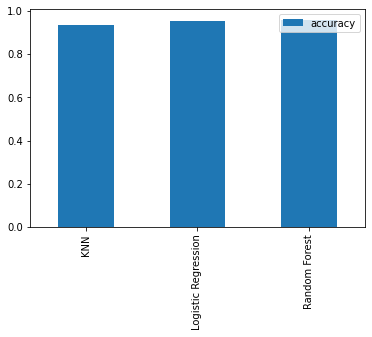

In [23]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()

Although it is not clear from the graph, Random Forest model performs best. 

## Hyperparameter tuning and cross-validation 

Since we do not have much data, we will be using cross-validation 

Here are the steps we are going to perform: 
1. Tune model hyperparameters and evaluate which model performs best 
2. Perform cross-validation 
3. Plot ROC curves 
4. Make confusion matrix 
5. Get precision, recall and F1-score metrics 
6. Find the most important model features 

### Tune KNeighborsClassifier 

In [24]:
# Create a list of train scores
train_scores = []

# Create a list of test scores 
test_scores = []

# Create a list of n_neighbors values 
neighbors = range(1, 21) # 1 to 20 

# Set up algorithm 
knn = KNeighborsClassifier()

# Loop through different neighbors values 
for i in neighbors: 
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm 
    knn.fit(X_train, y_train) 
    
    # Append to train scores 
    train_scores.append(knn.score(X_train, y_train))
    
    # Append to test scores
    test_scores.append(knn.score(X_test, y_test))
    

In [25]:
train_scores

[1.0,
 0.907035175879397,
 0.9020100502512562,
 0.8919597989949749,
 0.8869346733668342,
 0.8869346733668342,
 0.8819095477386935,
 0.8743718592964824,
 0.864321608040201,
 0.8768844221105527,
 0.871859296482412,
 0.8768844221105527,
 0.8768844221105527,
 0.8743718592964824,
 0.8743718592964824,
 0.8743718592964824,
 0.871859296482412,
 0.8768844221105527,
 0.871859296482412,
 0.8743718592964824]

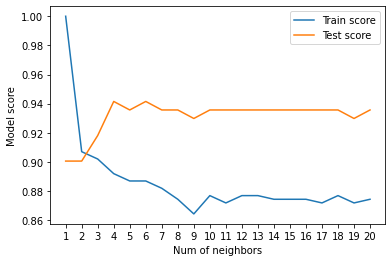

In [26]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score") 
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Num of neighbors')
plt.ylabel('Model score')
plt.legend()

In [27]:
print(f"Maximum KNN score on the test data: {max(test_scores) * 100:.2f}% at n_neighbors = {test_scores.index(max(test_scores)) + 1}")

Maximum KNN score on the test data: 94.15% at n_neighbors = 4


The KNN's model performance did not performace as well as LogisticRegression and RandomForestClassifer. Therefore, we will disregard this model and move on to tuning the next two models. 

### Tuning models with RandomizedSearchCV

In [28]:
# Set up differentt LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]} # For small datasets, ‘liblinear’ is a good choice

# Set up different RandomForest hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50), 
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [29]:
# Random seed 
np.random.seed(80121) 

# Set up random hyperparameter search for LogisticRegression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                                param_distributions=log_reg_grid,
                                cv=5, 
                                n_iter=20,
                                verbose=True) 

# Fit random hyperparameter search model 
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [30]:
# Find best parametes
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1438.44988828766}

In [31]:
# Evaluate randomized search logistic regression model 
rs_log_reg.score(X_test, y_test) 

0.9649122807017544

In [32]:
# Random seed 
np.random.seed(80121) 

# Set up random hyperparameter search for LogisticRegression 
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                                param_distributions=rf_grid,
                                cv=5, 
                                n_iter=20,
                                verbose=True) 

# Fit random hyperparameter search model 
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [33]:
# Find best parametes
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [34]:
rs_rf.score(X_test, y_test)

0.9649122807017544

### Tuning the model with GridSearchCV

In [35]:
# Set up different RandomForest hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameters search model 
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [36]:
# Check best parameters
gs_log_reg.best_params_

{'C': 1438.44988828766, 'solver': 'liblinear'}

In [37]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.9649122807017544

We get the same result with RandomizedSearchCV. 

### Evaluating classification model

In [38]:
# Let's test by making predictions on test set
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [39]:
y_test

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

### ROC curve and AUC scores

We compare true positive rate to false positive rate

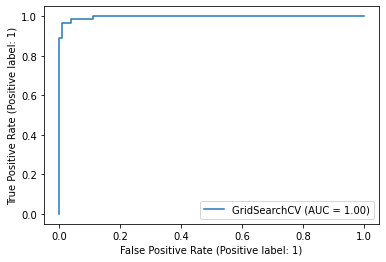

In [40]:
# Import ROC curve function 
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC score
plot_roc_curve(gs_log_reg, X_test, y_test)

We get a perfect model with an AUC score of 1.0 

### Confusion matrix

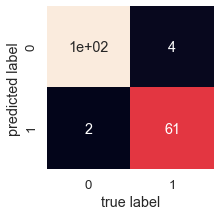

In [41]:
import seaborn as sns 
sns.set(font_scale=1.2)

def plot_conf_matrix(y_test, y_preds):
    """
    Plot confusion matrix using heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, 
                     cbar=False) 
    plt.xlabel("true label")
    plt.ylabel("predicted label") 
    
plot_conf_matrix(y_test, y_preds)

There are 4 occurences where model predicted 0 when the true value is 1 (false positive) and 2 occassions where model predict 1 but is actually 0 (false positive).

### Classification report 

In [42]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [43]:
# Import cross_val_score 
from sklearn.model_selection import cross_val_score 

# Use the best hyperparameters (via GridSearchCV)
clf = LogisticRegression(C=1438.44988828766,
                         solver="liblinear")

In [44]:
# Cross validation accuracy score (accuracy of model)

cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.9314857941313461

In [45]:
# Cross validation precision score (proportion of positive identifications which are indeed true)

cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.9264148047074876

In [46]:
# Cross validation recall score (proportion of actual positives that are correctly classified)

cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8872646733111849

In [47]:
# Cross validation F1 score (a combo of precision and recall)

cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.9057644076020475

<AxesSubplot:title={'center':'Cross validation Metrics'}>

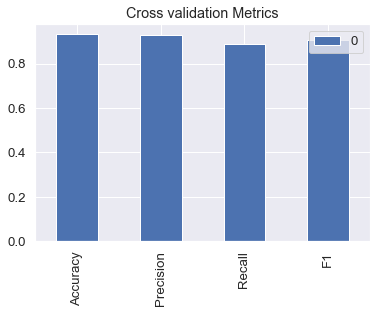

In [48]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                            index=[0])
cv_metrics.T.plot.bar(title="Cross validation Metrics")